## Librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings('ignore')

## Datos

In [4]:
df = pd.read_csv('Data/titanic.csv').drop('Unnamed: 0', 1)

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Identificando valores nulos**

In [6]:
pd.DataFrame(round(df.isnull().sum()/len(df)*100,2)).rename(columns={0:'Valores nulos'})

,Valores nulos
PassengerId,0.00
Survived,0.00
Pclass,0.00
Name,0.00
Sex,0.00
Age,19.87
SibSp,0.00
Parch,0.00
Ticket,0.00
Fare,0.00


In [7]:
round(df[df['Sex'] == 'female']['Survived'].sum()/len(df[df['Sex'] == 'female'])*100, 2)

74.2

In [8]:
round(df[df['Sex'] == 'male']['Survived'].sum()/len(df[df['Sex'] == 'male'])*100, 2)

18.89

In [9]:
x = df['Sex']
y = df['Survived']

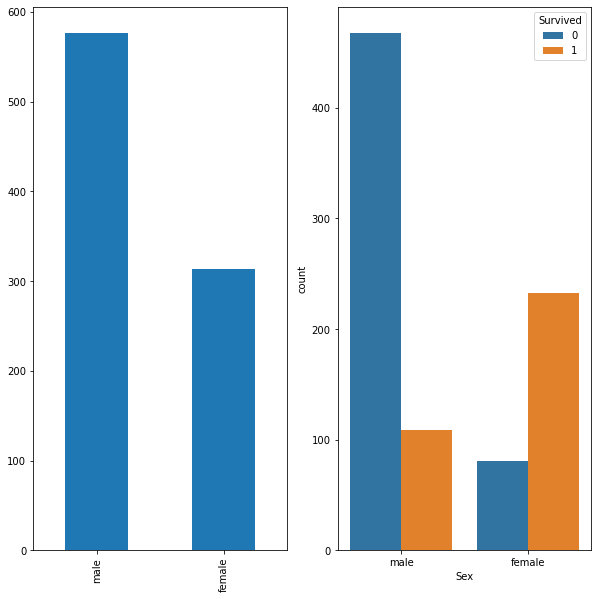

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(10,10))
x.value_counts().plot.bar(ax=ax[0])
sns.countplot(x, hue=y, ax=ax[1])
plt.show()

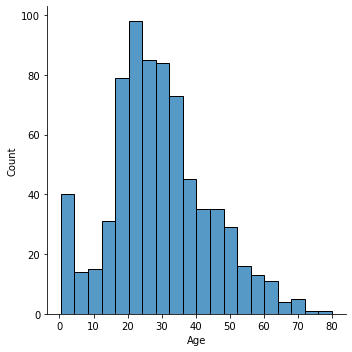

In [11]:
sns.displot(df['Age'].dropna())
plt.show()

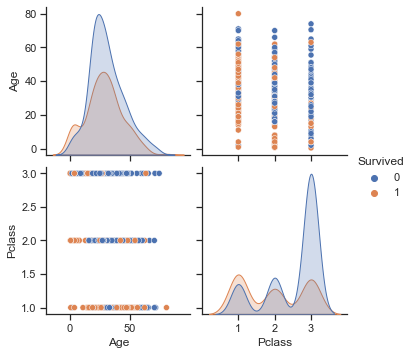

In [12]:
sns.set(style='ticks', color_codes=True)
sns.pairplot(df, vars=['Age', 'Pclass'], hue='Survived')

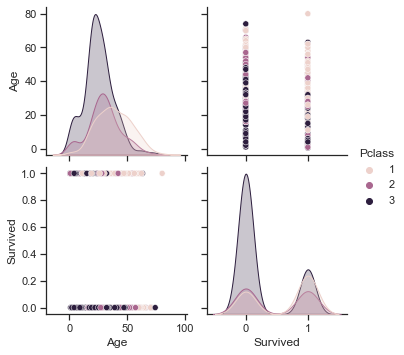

In [13]:
sns.set(style='ticks', color_codes=True)
sns.pairplot(df, vars=['Age', 'Survived'], hue='Pclass')

In [14]:
df.corr(method='pearson')

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


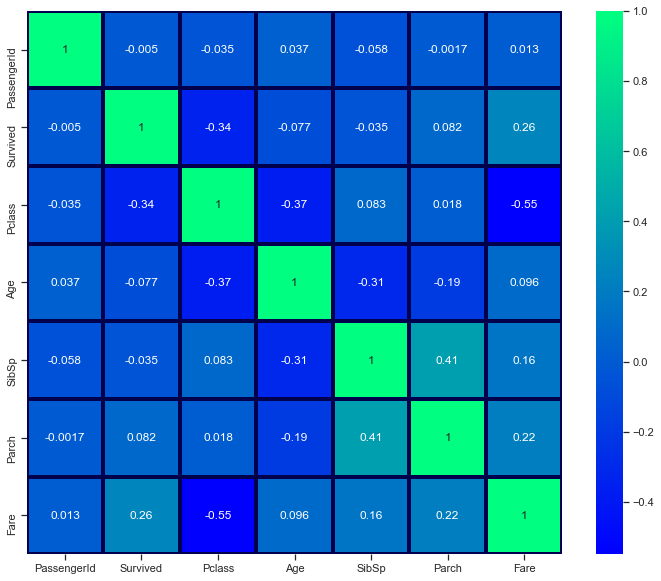

In [50]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), cmap='winter', annot=True, linewidths=3, linecolor='#00004D', cbar=True)
plt.show()